# **Jena Climate Database**

### *Librerias*

In [132]:
!pip install yfinance arch statsmodels matplotlib pandas numpy plotly meteostat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


### *Data*

In [133]:
jenaClimateData = pd.read_csv('../data/jena_climate_2009_2016.csv')
jenaClimateData

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


## 1) Para las columnas de temperatura, presion y humedad analizaremos su estacionariedad mediante:

### a. Gráfico de la serie de tiempo

In [134]:
# Convertir fecha y establecer como índice
jenaClimateData['Date Time'] = pd.to_datetime(jenaClimateData['Date Time'], format='%d.%m.%Y %H:%M:%S')
jenaClimateData.set_index('Date Time', inplace=True)

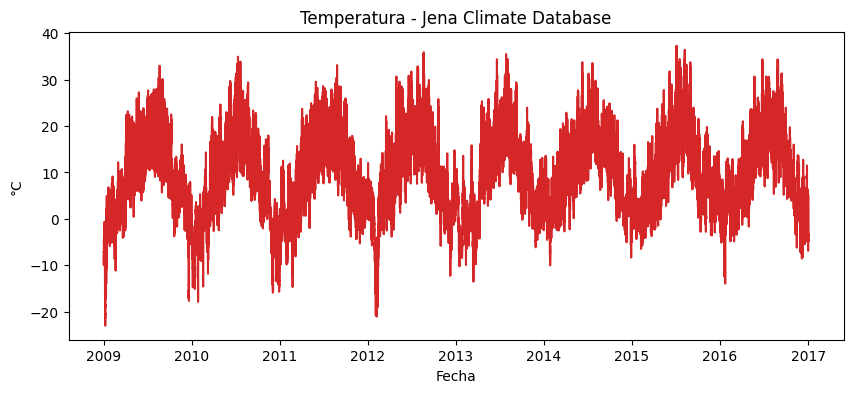

In [135]:
# a. Gráfico de la serie de tiempo - TEMPERATURA
temperatura = jenaClimateData['T (degC)'].dropna()

plt.figure(figsize=(10,4))
plt.plot(temperatura, color='tab:red')
plt.title("Temperatura - Jena Climate Database")
plt.ylabel("°C")
plt.xlabel("Fecha")
plt.show()

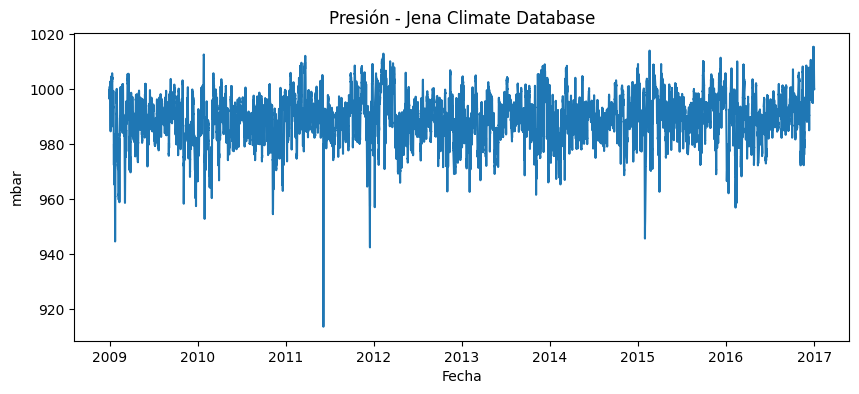

In [136]:
# a. Gráfico de la serie de tiempo - PRESIÓN
presion = jenaClimateData['p (mbar)'].dropna()

plt.figure(figsize=(10,4))
plt.plot(presion, color='tab:blue')
plt.title("Presión - Jena Climate Database")
plt.ylabel("mbar")
plt.xlabel("Fecha")
plt.show()

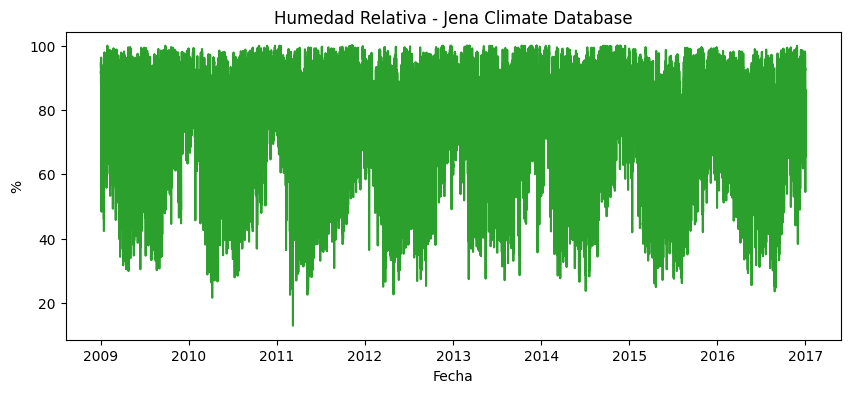

In [137]:
# a. Gráfico de la serie de tiempo - HUMEDAD
humedad = jenaClimateData['rh (%)'].dropna()

plt.figure(figsize=(10,4))
plt.plot(humedad, color='tab:green')
plt.title("Humedad Relativa - Jena Climate Database")
plt.ylabel("%")
plt.xlabel("Fecha")
plt.show()

### b. y c. Gráfico de ACF y PACF

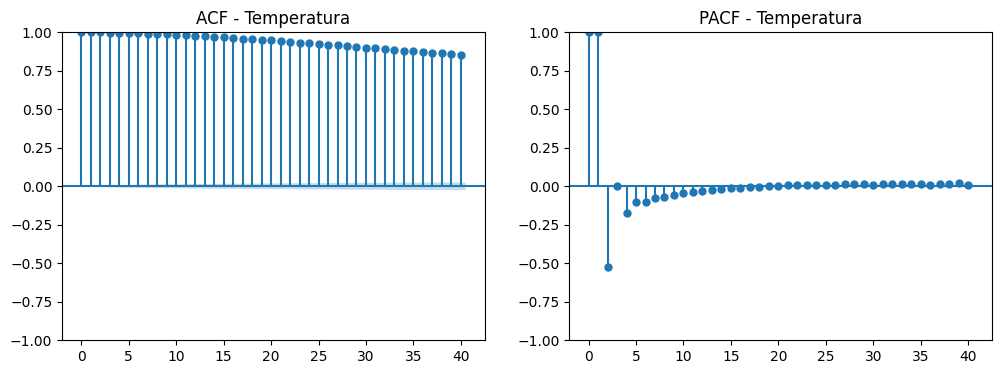

In [138]:
#TEMPERATURA
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(temperatura, lags=40, ax=ax[0])
plot_pacf(temperatura, lags=40, ax=ax[1])
ax[0].set_title("ACF - Temperatura")
ax[1].set_title("PACF - Temperatura")
plt.show()

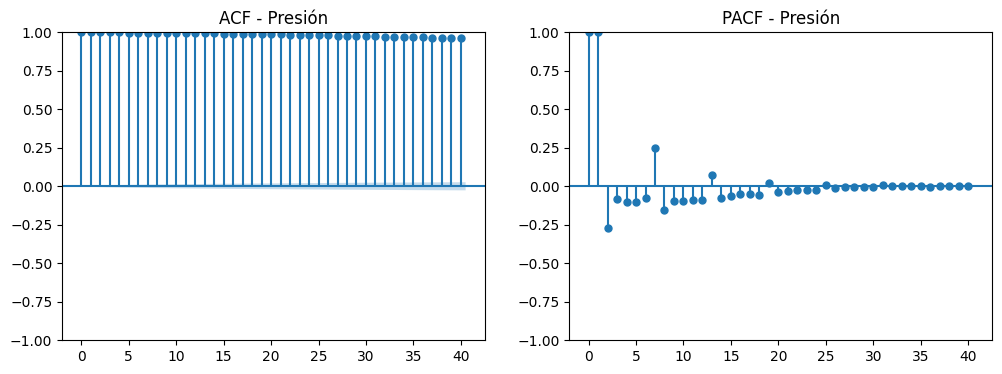

In [139]:
# PRESIÓN
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(presion, lags=40, ax=ax[0])
plot_pacf(presion, lags=40, ax=ax[1])
ax[0].set_title("ACF - Presión")
ax[1].set_title("PACF - Presión")
plt.show()

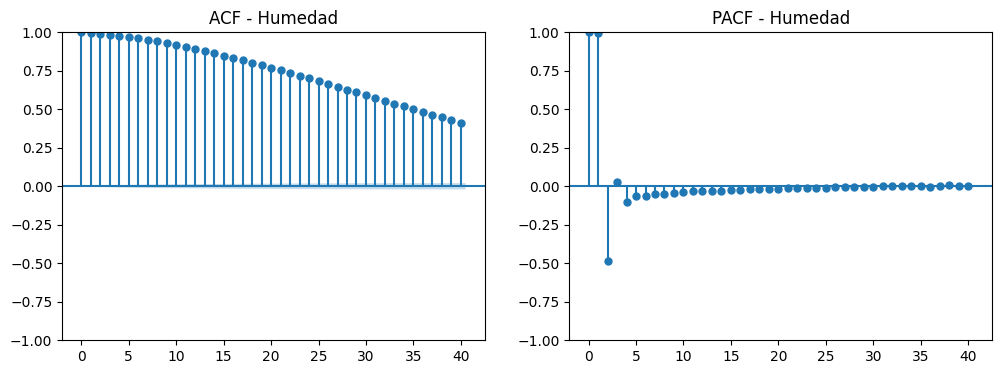

In [140]:
# HUMEDAD
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(humedad, lags=40, ax=ax[0])
plot_pacf(humedad, lags=40, ax=ax[1])
ax[0].set_title("ACF - Humedad")
ax[1].set_title("PACF - Humedad")
plt.show()

### d. Test ADF

In [141]:
# TEMPERATURA
adf_result = adfuller(temperatura)
print("=== TEMPERATURA ===")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Serie estacionaria (se rechaza H0)")
else:
    print("Serie NO estacionaria (no se rechaza H0)")

=== TEMPERATURA ===
ADF Statistic: -9.39641407889869
p-value: 6.35665906625904e-16
Serie estacionaria (se rechaza H0)


In [142]:
# PRESIÓN
adf_result = adfuller(presion)
print("=== PRESIÓN ===")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Serie estacionaria (se rechaza H0)")
else:
    print("Serie NO estacionaria (no se rechaza H0)")

=== PRESIÓN ===
ADF Statistic: -20.945601123793466
p-value: 0.0
Serie estacionaria (se rechaza H0)


In [143]:
# HUMEDAD
adf_result = adfuller(humedad)
print("=== HUMEDAD ===")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Serie estacionaria (se rechaza H0)")
else:
    print("Serie NO estacionaria (no se rechaza H0)")

=== HUMEDAD ===
ADF Statistic: -26.667232178807044
p-value: 0.0
Serie estacionaria (se rechaza H0)


### e. Para las columnas que no son estacionarias, repetimos el analisis sobre sus diferencias

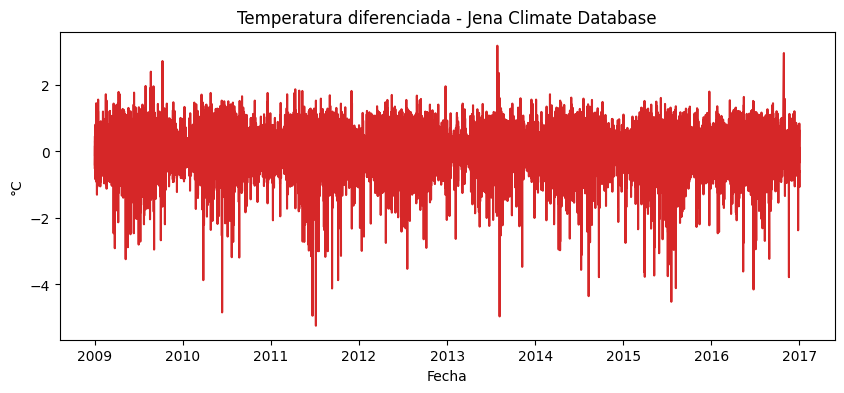

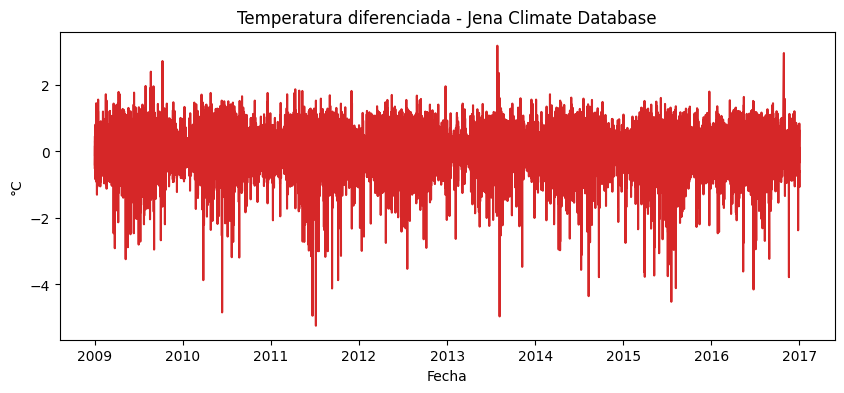

=== TEMPERATURA DIFERENCIADA ===
ADF Statistic: -122.25639326414154
p-value: 0.0
Serie estacionaria (se rechaza H0)


In [144]:
# TEMPERATURA diferenciada
plt.figure(figsize=(10,4))
plt.plot(temperatura.diff(), color='tab:red')
plt.title("Temperatura diferenciada - Jena Climate Database")
plt.ylabel("°C")
plt.xlabel("Fecha")
plt.show()

# Test ADF en temperatura diferenciada
adf_result = adfuller(temperatura.diff().dropna())
print("=== TEMPERATURA DIFERENCIADA ===")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Serie estacionaria (se rechaza H0)")
else:
    print("Serie NO estacionaria (no se rechaza H0)")

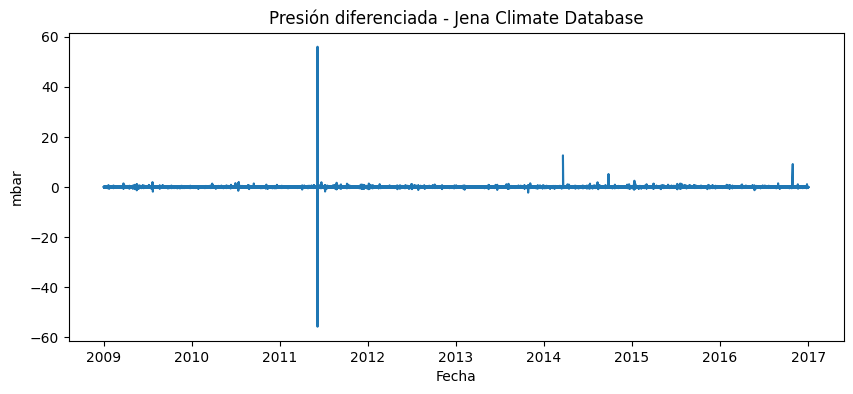

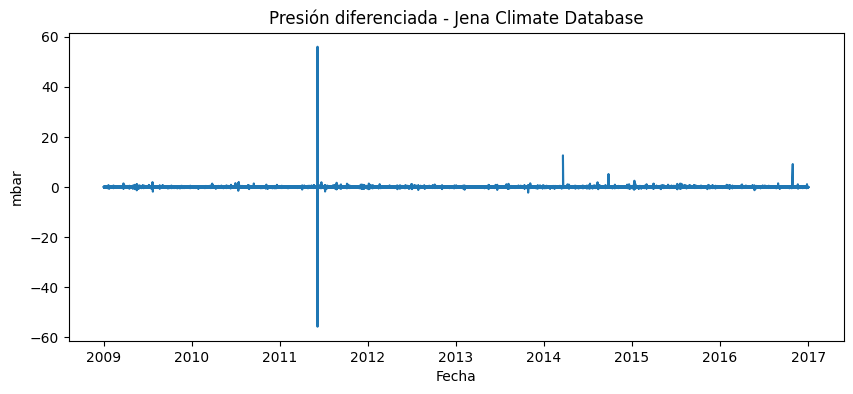

=== PRESIÓN DIFERENCIADA ===
ADF Statistic: -59.104715886372055
p-value: 0.0
Serie estacionaria (se rechaza H0)


In [145]:
# PRESIÓN diferenciada
plt.figure(figsize=(10,4))
plt.plot(presion.diff(), color='tab:blue')
plt.title("Presión diferenciada - Jena Climate Database")
plt.ylabel("mbar")
plt.xlabel("Fecha")
plt.show()

# Test ADF en presión diferenciada
adf_result = adfuller(presion.diff().dropna())
print("=== PRESIÓN DIFERENCIADA ===")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Serie estacionaria (se rechaza H0)")
else:
    print("Serie NO estacionaria (no se rechaza H0)")

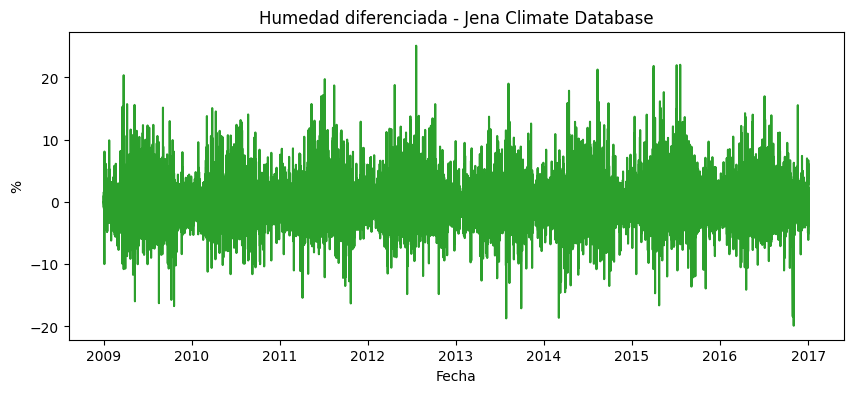

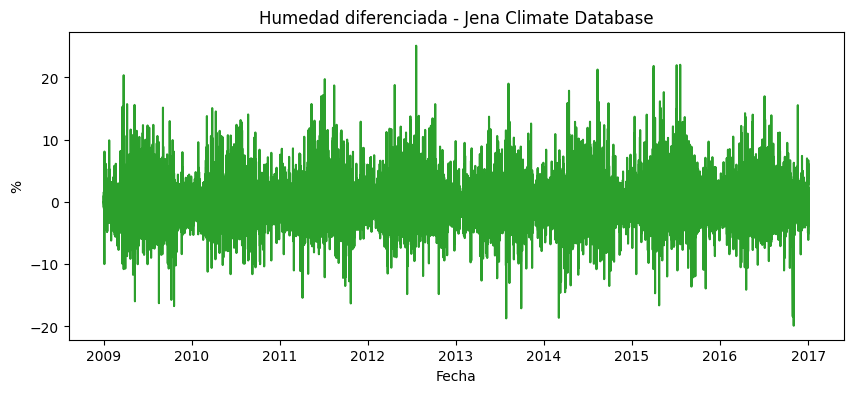

=== HUMEDAD DIFERENCIADA ===
ADF Statistic: -122.91713124036167
p-value: 0.0
Serie estacionaria (se rechaza H0)


In [146]:
# HUMEDAD diferenciada
plt.figure(figsize=(10,4))
plt.plot(humedad.diff(), color='tab:green')
plt.title("Humedad diferenciada - Jena Climate Database")
plt.ylabel("%")
plt.xlabel("Fecha")
plt.show()

# Test ADF en humedad diferenciada
adf_result = adfuller(humedad.diff().dropna())
print("=== HUMEDAD DIFERENCIADA ===")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Serie estacionaria (se rechaza H0)")
else:
    print("Serie NO estacionaria (no se rechaza H0)")

### f. División de datos en train y test

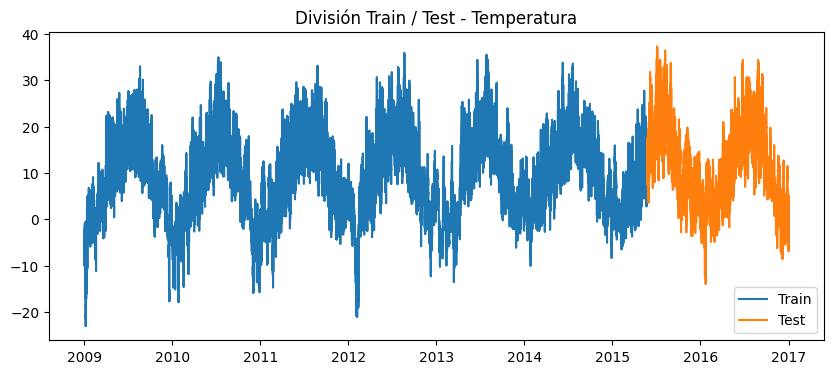

In [147]:
# Train / Test split - TEMPERATURA
train_size = int(len(temperatura)*0.8)
train_t, test_t = temperatura[:train_size], temperatura[train_size:]

plt.figure(figsize=(10,4))
plt.plot(train_t, label="Train")
plt.plot(test_t, label="Test")
plt.title("División Train / Test - Temperatura")
plt.legend()
plt.show()

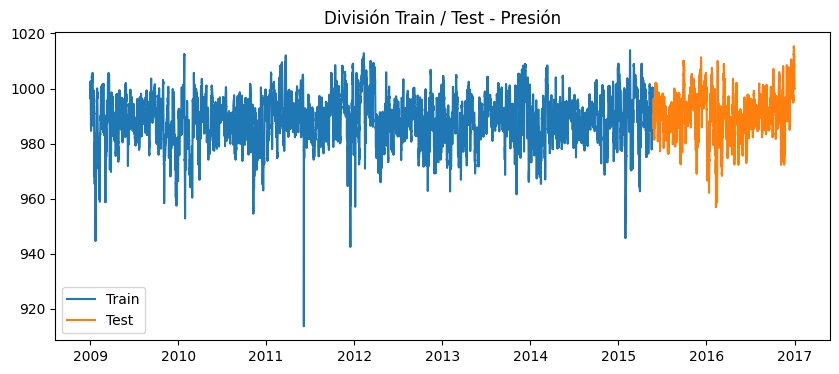

In [148]:
# Train / Test split - PRESIÓN
train_size = int(len(presion)*0.8)
train_p, test_p = presion[:train_size], presion[train_size:]

plt.figure(figsize=(10,4))
plt.plot(train_p, label="Train")
plt.plot(test_p, label="Test")
plt.title("División Train / Test - Presión")
plt.legend()
plt.show()

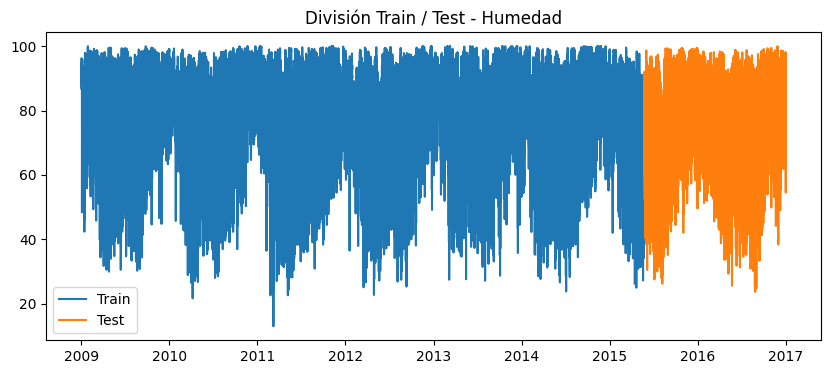

In [149]:
# Train / Test split - HUMEDAD
train_size = int(len(humedad)*0.8)
train_h, test_h = humedad[:train_size], humedad[train_size:]

plt.figure(figsize=(10,4))
plt.plot(train_h, label="Train")
plt.plot(test_h, label="Test")
plt.title("División Train / Test - Humedad")
plt.legend()
plt.show()

## 2) Por cada columna:

### a. Entrenar un modelo ARIMA de órdenes adecuado de acuerdo al criterio AIC realizando un grid search

In [150]:
# Grid Search ARIMA por AIC
p = q = range(0, 3)
d = [0, 1]
params = list(itertools.product(p, d, q))

In [151]:
# TEMPERATURA - Grid Search ARIMA por AIC
best_aic_temp = np.inf
best_order_temp = None
best_model_temp = None

for order in params:
    try:
        model = ARIMA(train_t, order=order).fit()
        if model.aic < best_aic_temp:
            best_aic_temp = model.aic
            best_order_temp = order
            best_model_temp = model
    except:
        continue

print(f"TEMPERATURA - Mejor ARIMA{best_order_temp} con AIC = {best_aic_temp:.2f}")

In [152]:
# PRESIÓN - Grid Search ARIMA por AIC
best_aic_pres = np.inf
best_order_pres = None
best_model_pres = None

for order in params:
    try:
        model = ARIMA(train_p, order=order).fit()
        if model.aic < best_aic_pres:
            best_aic_pres = model.aic
            best_order_pres = order
            best_model_pres = model
    except:
        continue

print(f"PRESIÓN - Mejor ARIMA{best_order_pres} con AIC = {best_aic_pres:.2f}")

PRESIÓN - Mejor ARIMA(2, 1, 2) con AIC = -275591.96


In [153]:
# HUMEDAD - Grid Search ARIMA por AIC
best_aic_hum = np.inf
best_order_hum = None
best_model_hum = None

for order in params:
    try:
        model = ARIMA(train_h, order=order).fit()
        if model.aic < best_aic_hum:
            best_aic_hum = model.aic
            best_order_hum = order
            best_model_hum = model
    except:
        continue

print(f"HUMEDAD - Mejor ARIMA{best_order_hum} con AIC = {best_aic_hum:.2f}")

HUMEDAD - Mejor ARIMA(2, 0, 2) con AIC = 980942.87


### b. Calcular el MSE para cada modelo por separado

In [154]:
# TEMPERATURA - Predicción ARIMA y MSE
pred_temp = best_model_temp.forecast(steps=len(test_t))
mse_temp = np.mean((test_t.values - pred_temp.values)**2)
print(f"TEMPERATURA - MSE: {mse_temp:.4f}")

TEMPERATURA - MSE: 87.1073


In [155]:
# PRESIÓN - Predicción ARIMA y MSE
pred_pres = best_model_pres.forecast(steps=len(test_p))
mse_pres = np.mean((test_p.values - pred_pres.values)**2)
print(f"PRESIÓN - MSE: {mse_pres:.4f}")

PRESIÓN - MSE: 72.4278


In [156]:
# HUMEDAD - Predicción ARIMA y MSE
pred_hum = best_model_hum.forecast(steps=len(test_h))
mse_hum = np.mean((test_h.values - pred_hum.values)**2)
print(f"HUMEDAD - MSE: {mse_hum:.4f}")

HUMEDAD - MSE: 268.5491


### c. Realizar un gráfico de su predicción sobre test

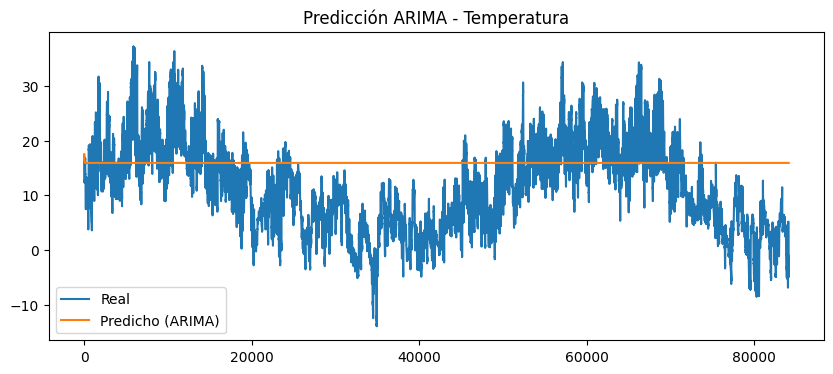

In [157]:
# TEMPERATURA
plt.figure(figsize=(10,4))
plt.plot(test_t.values, label="Real")
plt.plot(pred_temp.values, label="Predicho (ARIMA)")
plt.title("Predicción ARIMA - Temperatura")
plt.legend()
plt.show()

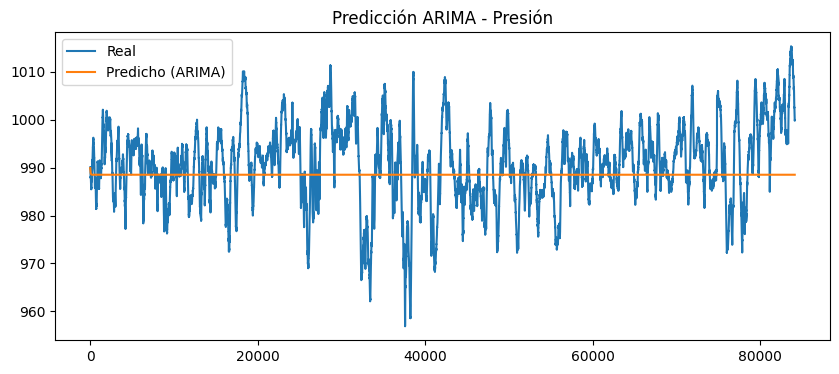

In [158]:
# PRESIÓN
plt.figure(figsize=(10,4))
plt.plot(test_p.values, label="Real")
plt.plot(pred_pres.values, label="Predicho (ARIMA)")
plt.title("Predicción ARIMA - Presión")
plt.legend()
plt.show()

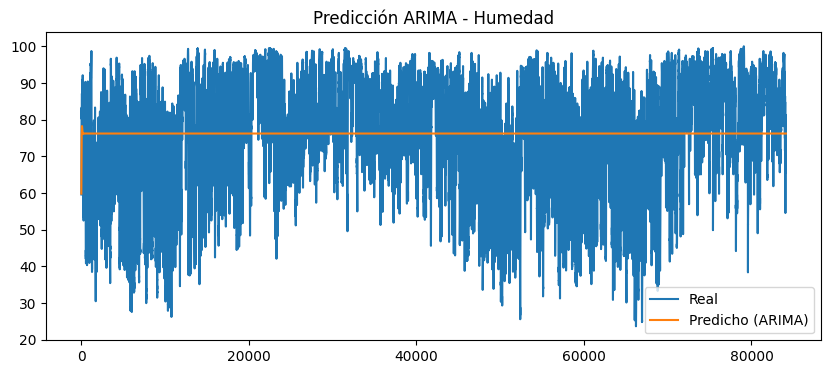

In [159]:
# HUMEDAD
plt.figure(figsize=(10,4))
plt.plot(test_h.values, label="Real")
plt.plot(pred_hum.values, label="Predicho (ARIMA)")
plt.title("Predicción ARIMA - Humedad")
plt.legend()
plt.show()

## 3) Entrenar un modelo VARMAX para predecir las tres columnas en conjunto

### a. Investigar y describir brevemente (un párrafo corto) en qué consiste el modelo:

El modelo VARMAX (Vector Autoregressive Moving Average with eXogenous variables) es una extensión multivariada de los modelos ARIMA que permite analizar simultáneamente múltiples series de tiempo interdependientes, incorporando además variables exógenas. A diferencia de ARIMA que modela una sola serie, VARMAX captura las relaciones dinámicas entre varias variables, donde cada variable puede ser predicha no solo por sus propios valores pasados, sino también por los valores pasados de las otras variables del sistema. La componente "X" permite incluir variables externas que pueden influir en el sistema pero no son explicadas por él, como factores económicos, climáticos o políticos. Este modelo es especialmente útil en econometría, finanzas y análisis de series temporales complejas donde las variables están interconectadas, como el análisis conjunto de temperatura, presión y humedad en datos climáticos, donde cada variable puede influir y ser influida por las otras.